## Sample Dataset

In [3]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': ['pria', 'pria', 'pria', 'pria', 'wanita','wanita','wanita','wanita','wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


## Visualisasi Data

<function matplotlib.pyplot.show(close=None, block=None)>

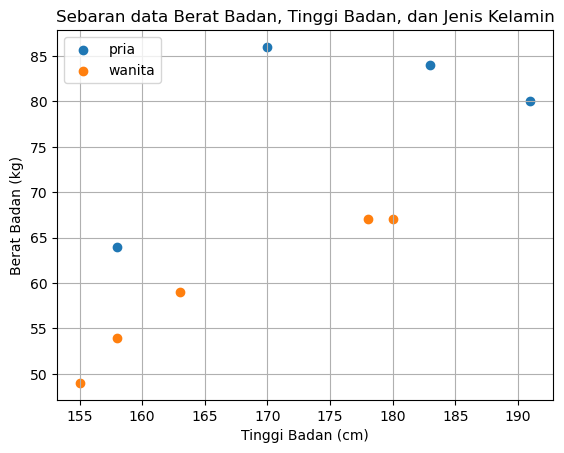

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
    
plt.legend(loc='upper left')
plt.title('Sebaran data Berat Badan, Tinggi Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show

# Clasiffication dengan KNN
## Preprocessing Dataset

In [9]:
import numpy as np

X_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n {X_train}\n')
print(f'y_train: {y_train}')

X_train:
 [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [13]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


## Training KNN Classification Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediksi Jenis Kelamin

In [22]:
tinggi_badan = 170
berat_badan = 57
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[170,  57]])

In [23]:
y_new = model.predict(X_new)
y_new

array([1])

In [25]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

## Visualisasi Nearest Neighbors

<function matplotlib.pyplot.show(close=None, block=None)>

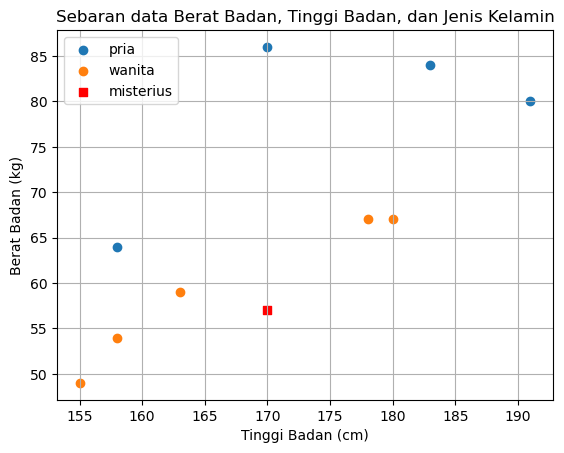

In [26]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
    
plt.scatter(tinggi_badan, berat_badan, marker='s', color='red', label='misterius')
    
plt.legend(loc='upper left')
plt.title('Sebaran data Berat Badan, Tinggi Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show

## Kalkulasi Distance (Euclidean Distance)

In [27]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([170,  57])

In [28]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [31]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[13.892443989449804,
 29.0,
 29.966648127543394,
 31.144823004794873,
 17.0,
 7.280109889280518,
 14.142135623730951,
 12.36931687685298,
 12.806248474865697]

In [33]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
5,163,59,wanita,7.280110
7,158,54,wanita,12.369317
8,178,67,wanita,12.806248
0,158,64,pria,13.892444
6,180,67,wanita,14.142136
4,155,49,wanita,17.000000
1,170,86,pria,29.000000
2,183,84,pria,29.966648
3,191,80,pria,31.144823


## Evaluasi KNN Classification Model

### Testing Set

In [34]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


### Prediksi terhadap Testing Set

In [35]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

## Accuracy

In [36]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


## Precission

In [39]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


## Recall

In [41]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


## Classification Report

In [44]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## Matthews Corelation Coeffition (MCC)

In [45]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
